In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from composition_stats import closure
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 
  
# current directory 
current_dir = os.getcwd() 
relative_path=os.path.abspath(os.path.join(current_dir, os.pardir))

In [3]:
SLR_data = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\SLR2_full_data.csv"))
SLR_data['Year'] = pd.to_datetime(SLR_data['Year'])
SLR_data =SLR_data.set_index("Year")

In [5]:
SLR_1=SLR_data['log_ratio_1']
SLR_2=SLR_data['log_ratio_2']

In [6]:
arima_model_1 = ARIMA(SLR_1, order=(2, 2, 2)).fit()
prediction_1 = arima_model_1.predict(
    start=len(SLR_1), end=len(SLR_1)+19)
prediction_1 = prediction_1.to_frame()
prediction_1.rename(columns = {'predicted_mean':0}, inplace = True)
final_1 = pd.concat([SLR_1, prediction_1])

In [7]:
arima_model_2 = ARIMA(SLR_2, order=(3,2, 4)).fit()
prediction_2 = arima_model_2.predict(
    start=len(SLR_2), end=len(SLR_2)+19)
prediction_2 = prediction_2.to_frame()
prediction_2.rename(columns = {'predicted_mean':0}, inplace = True)
final_2 = pd.concat([SLR_2, prediction_2])

In [8]:
final_1.rename(columns = {0:'log_ratio_1'}, inplace = True)
final_2.rename(columns = {0:'log_ratio_2'}, inplace = True)

In [9]:
def SLR2_inv(df1,df2):
    arr_1 = df1.to_numpy()
    arr_2 = df2.to_numpy()
    log_ratio_1 = pd.DataFrame(arr_1,columns=['log_ratio_1'])
    log_ratio_2 = pd.DataFrame(arr_2,columns=['log_ratio_2'])
    e2_arr=[]
    y2_arr=[]
    k2_arr=[]
    for i in range(len(df1)):
        A = log_ratio_1._get_value(i,0,takeable = True)
        B = log_ratio_2._get_value(i,0,takeable = True)
        e2_arr.append(1)
        y2_arr.append(1/(10**A))
        k2_arr.append(1/(10**B))
    e_prepro = pd.DataFrame(e2_arr, columns=['e_prepro'])
    y_prepro = pd.DataFrame(y2_arr, columns=['y_prepro'])
    k_prepro = pd.DataFrame(k2_arr, columns=['k_prepro'])
    prepro = pd.concat([e_prepro, y_prepro,k_prepro],axis=1)
    data_proportion = closure(prepro)
    return data_proportion

In [10]:
data_proportion=SLR2_inv(final_1,final_2)

In [11]:
def set_col(df):
    df = pd.DataFrame(df, columns=[
    'elder', 'youth', 'kid'])
    df['Year'] = df.index + 1964
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    df = df.set_index("Year")
    return df

In [12]:
proportion = set_col(data_proportion)

In [13]:
proportion

,elder,youth,kid
Year,,,
1964-01-01,0.032504,0.504384,0.463112
1965-01-01,0.031992,0.506028,0.461980
1966-01-01,0.032161,0.507334,0.460504
1967-01-01,0.032281,0.511010,0.456709
1968-01-01,0.032420,0.515973,0.451607
...,...,...,...
2037-01-01,0.130523,0.663873,0.205605
2038-01-01,0.135008,0.661306,0.203686
2039-01-01,0.139580,0.658644,0.201776


In [14]:
proportion.to_csv(relative_path+"\\age_structure_data\\proportion_full.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

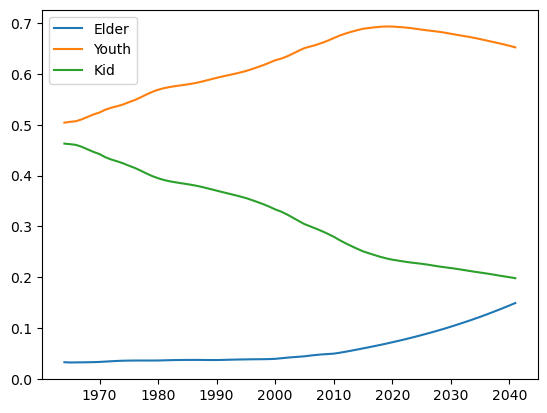

In [15]:
plt.plot(proportion['elder'],label="Elder")
plt.plot(proportion['youth'],label="Youth")
plt.plot(proportion['kid'],label="Kid")
plt.legend(loc='best')
plt.show

In [16]:
proportion_predicted=proportion[(proportion.index> '2020-01-01')]

In [17]:
total_pop = pd.DataFrame(pd.read_csv(
    relative_path+"\\age_structure_data\\population_forecast.csv",index_col=[0]))

In [18]:
total_pop.index = pd.to_datetime(total_pop.index)

In [19]:
cal_pop = pd.concat([proportion, total_pop],axis=1)

In [20]:
cal_pop=cal_pop[(cal_pop.index> '2021-01-01')]

In [21]:
cal_pop['elder_num']=cal_pop['elder']*cal_pop['all']
cal_pop['youth_num']=cal_pop['youth']*cal_pop['all']
cal_pop['kid_num']=cal_pop['kid']*cal_pop['all']

In [22]:
int(1.169775e+07)

11697750

In [23]:
cal_pop

,elder,youth,kid,all,elder_num,youth_num,kid_num
2022-01-01,0.077170,0.692053,0.230777,4.849272e+07,3.742197e+06,3.355951e+07,1.119101e+07
2023-01-01,0.080005,0.690888,0.229107,4.912590e+07,3.930311e+06,3.394048e+07,1.125511e+07
2024-01-01,0.082947,0.689293,0.227760,4.975940e+07,4.127387e+06,3.429881e+07,1.133321e+07
2025-01-01,0.085979,0.687602,0.226418,5.039311e+07,4.332764e+06,3.465042e+07,1.140992e+07
2026-01-01,0.089090,0.686128,0.224782,5.102696e+07,4.546003e+06,3.501100e+07,1.146996e+07
2027-01-01,0.092283,0.684821,0.222897,5.166091e+07,4.767405e+06,3.537845e+07,1.151505e+07
2028-01-01,0.095575,0.683360,0.221065,5.229490e+07,4.998070e+06,3.573627e+07,1.156056e+07
2029-01-01,0.098991,0.681540,0.219469,5.292889e+07,5.239481e+06,3.607317e+07,1.161623e+07
2030-01-01,0.102543,0.679473,0.217984,5.356285e+07,5.492470e+06,3.639453e+07,1.167586e+07
2031-01-01,0.106214,0.677422,0.216363,5.419679e+07,5.756478e+06,3.671411e+07,1.172620e+07


<function matplotlib.pyplot.show(close=None, block=None)>

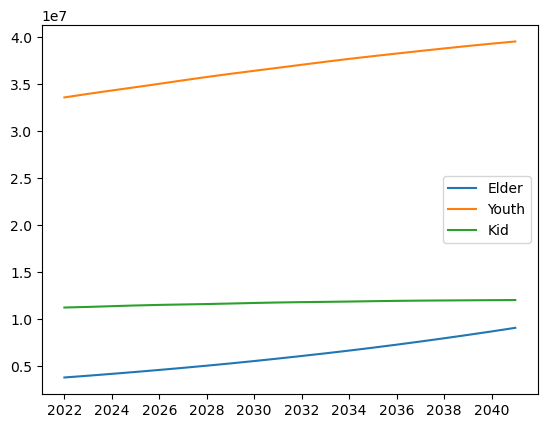

In [24]:
plt.plot(cal_pop['elder_num'],label="Elder")
plt.plot(cal_pop['youth_num'],label="Youth")
plt.plot(cal_pop['kid_num'],label="Kid")
plt.legend(loc='best')
plt.show